In [1]:
pip install opencv-python requests matplotlib

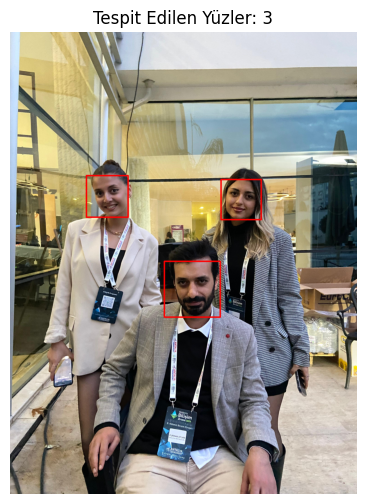

In [1]:
import cv2
import requests
import numpy as np
from matplotlib import pyplot as plt

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

image_url ="https://drive.google.com/uc?id=1fXQuSUz5jTBKv4iPui629CIztCM3Uc9j"
response = requests.get(image_url)  
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)  #
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)  

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=18, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 12)  # (0, 0, 255) kırmızı renk

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')  # Eksenleri kapatalım
plt.title(f"Tespit Edilen Yüzler: {len(faces)}") 
plt.show()
